# Cumulative day analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

cities = {'Bismarck, ND': (-100.773703, 46.801942),
          'Minneapolis, MN': (-93.2650, 44.9778),
          'Albany, NY': (-73.7562, 42.6526),
          'Omaha, NE': (-95.9345, 41.2565),
          'Columbus, OH': (-82.9988, 39.9612),
          'Denver, CO':(-104.9903, 39.7392),
          'St. Louis, MO': (-90.1994, 38.6270),
          'Charlotte, NC': (-80.8431, 35.2271),
          'Oklahoma City, OK':(-97.5164, 35.4676),
          'Tuscaloosa, AL': (-87.5692, 33.2098), 
          'San Antonio, TX': (-98.4936, 29.4241), 
          'Orlando, FL': (-81.3792, 28.5383), 
          }

out_dir = "../figures/cumulative_days/"

# Read in the lat/lon data from the NAM 212 grid.

In [2]:
coords = xr.open_dataset('../data/nam212.nc')

lats = coords.gridlat_212.values
lons = coords.gridlon_212.values

 # Run through the city lats and lons, find the closest grid to that point, and save it in a dictionary

In [3]:
from scipy.spatial import KDTree
import numpy as np

city_lookup = {}

pts = np.stack([lons.ravel(), lats.ravel()], axis=1)

flons, flats = pts[:, 0], pts[:, 1]

test = np.zeros(shape=(lats.shape))

tree = KDTree(list(zip(flons, flats)))

for key, value in cities.items():
    
    loc = tree.query(value)
    
    idx = np.unravel_index(loc[1], shape=lats.shape)
    
    test[idx] = 1
    
    city_lookup[key] = idx
    
    print(idx, lons[idx], lats[idx], value)
    
city_lookup

(82, 92) -100.91847 46.8055 (-100.773703, 46.801942)
(76, 108) -93.06891 44.845203 (-93.265, 44.9778)
(73, 149) -73.676025 42.597034 (-73.7562, 42.6526)
(66, 102) -95.933105 41.39053 (-95.9345, 41.2565)
(63, 130) -83.031204 39.93604 (-82.9988, 39.9612)
(62, 82) -105.10153 39.699127 (-104.9903, 39.7392)
(58, 115) -90.01058 38.50195 (-90.1994, 38.627)
(50, 136) -80.90761 35.120552 (-80.8431, 35.2271)
(49, 98) -97.64347 35.33841 (-97.5164, 35.4676)
(44, 121) -87.63795 33.391075 (-87.5692, 33.2098)
(33, 96) -98.35003 29.529873 (-98.4936, 29.4241)
(32, 137) -81.27024 28.59184 (-81.3792, 28.5383)


{'Bismarck, ND': (82, 92),
 'Minneapolis, MN': (76, 108),
 'Albany, NY': (73, 149),
 'Omaha, NE': (66, 102),
 'Columbus, OH': (63, 130),
 'Denver, CO': (62, 82),
 'St. Louis, MO': (58, 115),
 'Charlotte, NC': (50, 136),
 'Oklahoma City, OK': (49, 98),
 'Tuscaloosa, AL': (44, 121),
 'San Antonio, TX': (33, 96),
 'Orlando, FL': (32, 137)}

# Plot 5% Tornado data for the cities

In [4]:
colors = {'Bismarck, ND': "#e41a1c",
          'Minneapolis, MN': "#377eb8",
          'Albany, NY': "#4daf4a",
          'Omaha, NE': "#984ea3",
          'Columbus, OH': "#ff7f00",
          'Denver, CO': "#000000",
          'St. Louis, MO': "#e41a1c",
          'Charlotte, NC': "#377eb8",
          'Oklahoma City, OK': "#4daf4a",
          'Tuscaloosa, AL': "#984ea3",
          'San Antonio, TX': "#ff7f00",
          'Orlando, FL': "#000000"}

lstyle = {'Bismarck, ND': "-",
          'Minneapolis, MN': "-",
          'Albany, NY': "-",
          'Omaha, NE': "-",
          'Columbus, OH': "-",
          'Denver, CO': "-",
          'St. Louis, MO': "--",
          'Charlotte, NC': "--",
          'Oklahoma City, OK': "--",
          'Tuscaloosa, AL': "--",
          'San Antonio, TX': "--",
          'Orlando, FL': "--"}


def get_cumulative_count_city(ax, dset, name, var):
    
    res = np.zeros(shape=(40, 365), dtype=int)

    for year in range(1979, 2019):

        dsub = dset.sel(time=slice(str(year) + '-01-01', str(year) + '-12-31'))
        
        y, x = city_lookup[name]

        if var != None:
            vals = dsub[var].sel(y=y, x=x)
        else:
            vals = dsub.sel(y=y, x=x)

        vals = vals.groupby('time.dayofyear').sum()
            
        day_values = np.zeros(shape=(365), dtype=int)
            
        if calendar.isleap(year):
                
            values = vals.values
            values[58] += values[59]

            day_values[:59] = values[:59] 
            day_values[59:] = values[60:]
                
        else:
                
            day_values = vals.values

        res[year-1979,:] = np.cumsum(day_values)

    ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
            np.mean(res, axis=0), ls=lstyle[name], color=colors[name], lw=2, label=name)

    return ax

Bismarck, ND


C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\r37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Minneapolis, MN
Albany, NY
Omaha, NE
Columbus, OH
Denver, CO
St. Louis, MO
Charlotte, NC
Oklahoma City, OK
Tuscaloosa, AL
San Antonio, TX
Orlando, FL


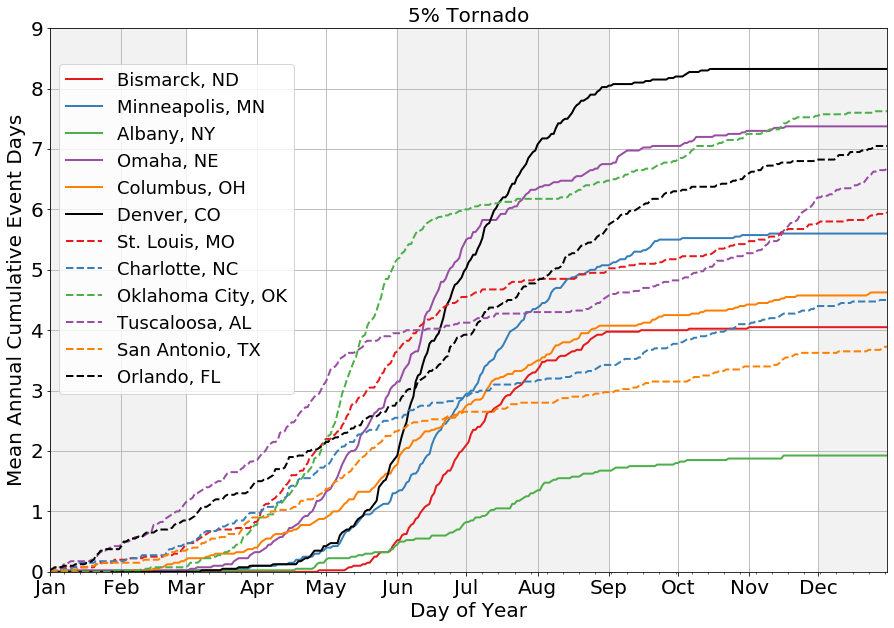

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

dset = xr.open_dataset("../data/tor_day_footprints_79-18_sid-212_grid.nc")

ax = plt.subplot(1, 1, 1)

for key, val in cities.items():
    
    print(key)
    ax = get_cumulative_count_city(ax, dset, key, 'pp_05')
    
ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Mean Annual Cumulative Event Days", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

#Use 2017 as a placeholder, we care only about day of year
ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)
ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=2, bbox_to_anchor=(0, .95))

ax.set_ylim(0, 9)

plt.grid()

#ax.annotate("b)", xy=('2017-01-05',9.1), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('5% Tornado', fontsize=20)

plt.savefig(out_dir + "cumulative_tor_days_212.png", bbox_inches='tight', dpi=300)

# Plot Hail cumulative days

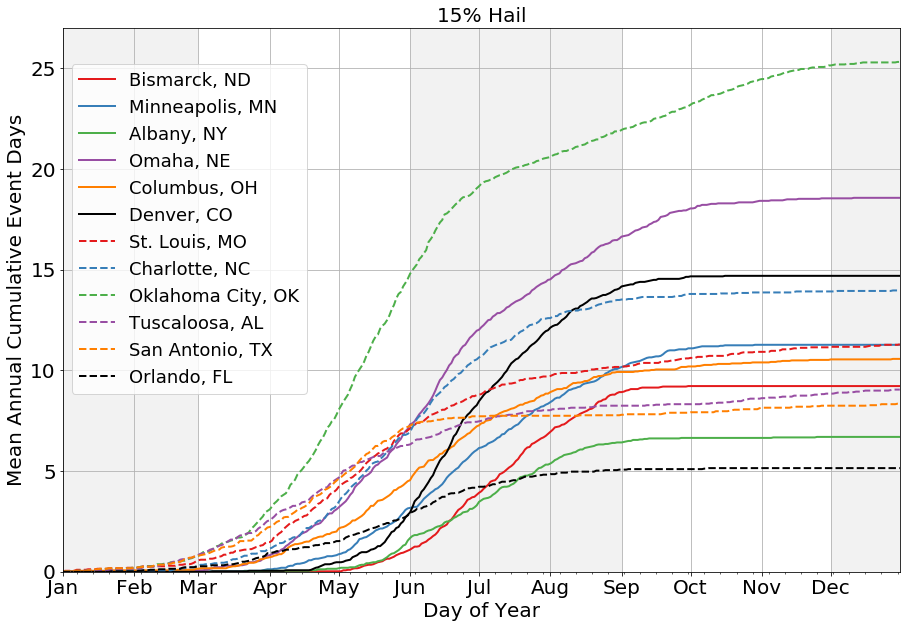

In [6]:
dset = xr.open_dataset("../data/hail_day_footprints_79-18_sid-212_grid.nc")

ax = plt.subplot(1, 1, 1)

for key, val in colors.items():
    
    ax = get_cumulative_count_city(ax, dset, key, 'pp_15')
    
ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Mean Annual Cumulative Event Days", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=2, bbox_to_anchor=(0, .95))

ax.set_ylim(0, 27)

plt.grid()

#ax.annotate("c)", xy=('2017-01-05',27), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('15% Hail', fontsize=20)

plt.savefig(out_dir + "cumulative_hail_days_212.png", bbox_inches='tight', dpi=300)

# Plot Wind cumulative days

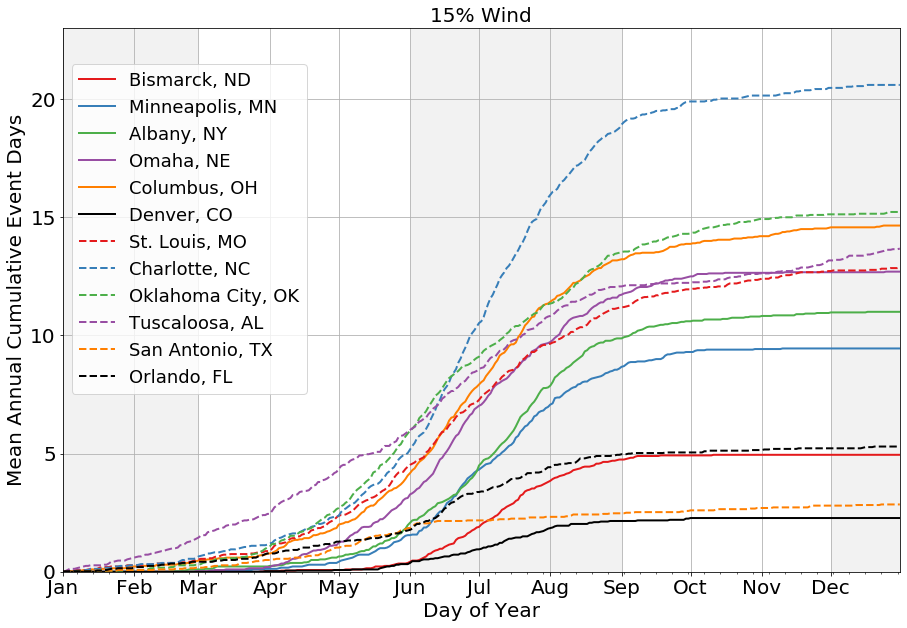

In [7]:
dset = xr.open_dataset("../data/wind_day_footprints_79-18_sid-212_grid.nc")

ax = plt.subplot(1, 1, 1)

for key, val in colors.items():
    
    ax = get_cumulative_count_city(ax, dset, key, 'pp_15')

    
ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Mean Annual Cumulative Event Days", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=2, bbox_to_anchor=(0, .95))

ax.set_ylim(0, 23)

plt.grid()

#ax.annotate("d)", xy=('2017-01-05',23), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('15% Wind', fontsize=20)

plt.savefig(out_dir + "cumulative_wind_days_212.png", bbox_inches='tight', dpi=300)

# Calculating "slight risk" occurrence 

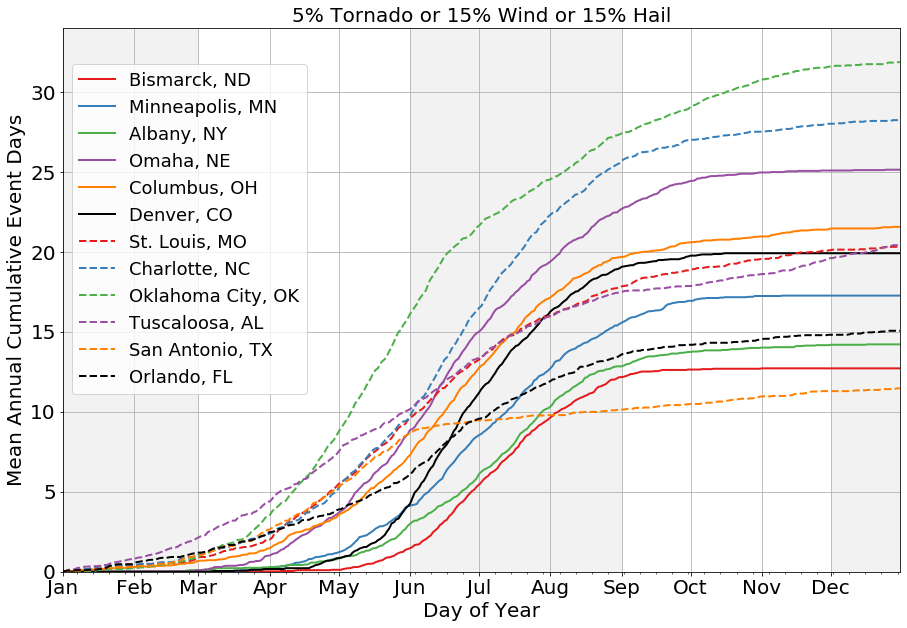

In [8]:
from copy import deepcopy

tor_dset = xr.open_dataset('../data/tor_day_footprints_79-18_sid-212_grid.nc')
hail_dset = xr.open_dataset('../data/hail_day_footprints_79-18_sid-212_grid.nc')
wind_dset = xr.open_dataset('../data/wind_day_footprints_79-18_sid-212_grid.nc')

slgt_tor = deepcopy(tor_dset['pp_05'])
slgt_hail = deepcopy(hail_dset['pp_15'])
slgt_wind = deepcopy(wind_dset['pp_15'])

#If tor, hail, OR wind is equal to 1, set that value to 1 in slight
slight = 1*((slgt_tor + slgt_hail + slgt_wind)>0)

ax = plt.subplot(1, 1, 1)

for key, val in colors.items():
    
    ax = get_cumulative_count_city(ax, slight, key, None)

ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Mean Annual Cumulative Event Days", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=2, bbox_to_anchor=(0, .95))

ax.set_ylim(0, 34)

plt.grid()

#ax.annotate("a)", xy=('2017-01-05',34), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('5% Tornado or 15% Wind or 15% Hail', fontsize=20)

plt.savefig(out_dir + "cumulative_slight_days_212.png", bbox_inches='tight', dpi=300)